In [1]:
import pymc as pm
import pandas as pd
import numpy as np


In [2]:
pymc_data = pd.read_csv('pymc_data.csv')
pymc_data

,Unnamed: 0,BCUT2D_CHGHI,BCUT2D_MRLOW,Chi0,Chi0n,Chi1,Chi1v,Chi2v,Chi3v,EState_VSA3,...,fr_nitro_arom,fr_phenol,fr_phenol_noOrthoHbond,fr_unbrch_alkane,outcome,Tissue_Type4,Cell_Type,Gender,Organism,Tissue_Type2
0,0,2.078754,1.305165,13.363597,10.146223,9.882143,9.723362,8.746527,7.776120,0.000000,...,0,0,0,0,0.0,Normal,epithelial,F,Human,kidney
1,1,2.255721,-0.139545,6.853371,4.755274,4.198377,2.721007,1.997013,1.293389,12.841643,...,0,0,0,0,0.0,Normal,epithelial,F,Human,kidney
2,2,2.114966,-0.117299,11.966255,10.617461,7.647066,5.746835,3.979984,2.496743,0.000000,...,0,0,0,0,0.0,Normal,epithelial,F,Human,kidney
3,3,2.061405,-0.146178,5.112884,4.144924,3.393847,2.550477,1.677577,1.038288,13.027704,...,0,0,0,0,0.0,Normal,epithelial,F,Human,kidney
4,4,2.131712,-0.136469,13.828063,10.550274,9.130229,5.939368,4.177882,2.970318,11.312963,...,0,0,0,0,0.0,Normal,epithelial,F,Human,kidney
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,695,1.801405,1.667832,5.983128,4.464102,3.787694,2.398717,1.666667,0.936467,0.000000,...,0,0,0,0,1.0,Primary,epithelial-like,M,Human,liver
396,696,2.392932,-0.042609,20.148054,16.438751,13.309663,11.555691,9.180429,5.588160,24.443417,...,0,0,0,0,1.0,Primary,epithelial-like,M,Human,liver
397,697,2.099693,1.532659,13.689870,11.773503,9.770857,7.065384,5.504843,4.443108,0.000000,...,0,0,0,0,1.0,Primary,epithelial-like,M,Human,liver
398,698,2.196300,0.094582,20.924074,17.759732,14.614194,10.900909,8.366904,5.981752,17.130841,...,0,0,0,0,1.0,Primary,epithelial-like,M,Human,liver


In [3]:
pymc_data.loc[pymc_data["outcome"] == 1, "outcome"] = 'active antagonist'
pymc_data.loc[pymc_data["outcome"] == 0, "outcome"] = 'inactive'

In [4]:
pymc_data

,Unnamed: 0,BCUT2D_CHGHI,BCUT2D_MRLOW,Chi0,Chi0n,Chi1,Chi1v,Chi2v,Chi3v,EState_VSA3,...,fr_nitro_arom,fr_phenol,fr_phenol_noOrthoHbond,fr_unbrch_alkane,outcome,Tissue_Type4,Cell_Type,Gender,Organism,Tissue_Type2
0,0,2.078754,1.305165,13.363597,10.146223,9.882143,9.723362,8.746527,7.776120,0.000000,...,0,0,0,0,inactive,Normal,epithelial,F,Human,kidney
1,1,2.255721,-0.139545,6.853371,4.755274,4.198377,2.721007,1.997013,1.293389,12.841643,...,0,0,0,0,inactive,Normal,epithelial,F,Human,kidney
2,2,2.114966,-0.117299,11.966255,10.617461,7.647066,5.746835,3.979984,2.496743,0.000000,...,0,0,0,0,inactive,Normal,epithelial,F,Human,kidney
3,3,2.061405,-0.146178,5.112884,4.144924,3.393847,2.550477,1.677577,1.038288,13.027704,...,0,0,0,0,inactive,Normal,epithelial,F,Human,kidney
4,4,2.131712,-0.136469,13.828063,10.550274,9.130229,5.939368,4.177882,2.970318,11.312963,...,0,0,0,0,inactive,Normal,epithelial,F,Human,kidney
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,695,1.801405,1.667832,5.983128,4.464102,3.787694,2.398717,1.666667,0.936467,0.000000,...,0,0,0,0,active antagonist,Primary,epithelial-like,M,Human,liver
396,696,2.392932,-0.042609,20.148054,16.438751,13.309663,11.555691,9.180429,5.588160,24.443417,...,0,0,0,0,active antagonist,Primary,epithelial-like,M,Human,liver
397,697,2.099693,1.532659,13.689870,11.773503,9.770857,7.065384,5.504843,4.443108,0.000000,...,0,0,0,0,active antagonist,Primary,epithelial-like,M,Human,liver
398,698,2.196300,0.094582,20.924074,17.759732,14.614194,10.900909,8.366904,5.981752,17.130841,...,0,0,0,0,active antagonist,Primary,epithelial-like,M,Human,liver


In [5]:
assay_info = pymc_data.iloc[:, 53:]
pymc_data.columns

Index(['Unnamed: 0', 'BCUT2D_CHGHI', 'BCUT2D_MRLOW', 'Chi0', 'Chi0n', 'Chi1',
       'Chi1v', 'Chi2v', 'Chi3v', 'EState_VSA3', 'EState_VSA6', 'EState_VSA7',
       'ExactMolWt', 'FractionCSP3', 'HeavyAtomMolWt', 'Kappa2', 'LabuteASA',
       'MaxPartialCharge', 'MolWt', 'NOCount', 'NumAromaticRings',
       'NumHeteroatoms', 'NumSaturatedCarbocycles', 'PEOE_VSA1', 'PEOE_VSA12',
       'PEOE_VSA13', 'PEOE_VSA6', 'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA5',
       'SMR_VSA9', 'SlogP_VSA1', 'SlogP_VSA10', 'SlogP_VSA4', 'VSA_EState10',
       'VSA_EState2', 'VSA_EState3', 'VSA_EState5', 'VSA_EState7',
       'VSA_EState9', 'ProtocolName', 'fr_Ar_OH', 'fr_NH0', 'fr_aniline',
       'fr_benzene', 'fr_halogen', 'fr_ketone', 'fr_nitro', 'fr_nitro_arom',
       'fr_phenol', 'fr_phenol_noOrthoHbond', 'fr_unbrch_alkane', 'outcome',
       'Tissue_Type4', 'Cell_Type', 'Gender', 'Organism', 'Tissue_Type2'],
      dtype='object')

In [6]:
assay_info

,Tissue_Type4,Cell_Type,Gender,Organism,Tissue_Type2
0,Normal,epithelial,F,Human,kidney
1,Normal,epithelial,F,Human,kidney
2,Normal,epithelial,F,Human,kidney
3,Normal,epithelial,F,Human,kidney
4,Normal,epithelial,F,Human,kidney
...,...,...,...,...,...
395,Primary,epithelial-like,M,Human,liver
396,Primary,epithelial-like,M,Human,liver
397,Primary,epithelial-like,M,Human,liver
398,Primary,epithelial-like,M,Human,liver


### Setup for bayesian model

In [7]:
assay_info['ProtocolName'] = pymc_data['ProtocolName']
assay_info

,Tissue_Type4,Cell_Type,Gender,Organism,Tissue_Type2,ProtocolName
0,Normal,epithelial,F,Human,kidney,tox21-ar-bla-antagonist-p1
1,Normal,epithelial,F,Human,kidney,tox21-ar-bla-antagonist-p1
2,Normal,epithelial,F,Human,kidney,tox21-ar-bla-antagonist-p1
3,Normal,epithelial,F,Human,kidney,tox21-ar-bla-antagonist-p1
4,Normal,epithelial,F,Human,kidney,tox21-ar-bla-antagonist-p1
...,...,...,...,...,...,...
395,Primary,epithelial-like,M,Human,liver,tox21-ahr-p1
396,Primary,epithelial-like,M,Human,liver,tox21-ahr-p1
397,Primary,epithelial-like,M,Human,liver,tox21-ahr-p1
398,Primary,epithelial-like,M,Human,liver,tox21-ahr-p1


In [8]:
assay_info.describe()

,Tissue_Type4,Cell_Type,Gender,Organism,Tissue_Type2,ProtocolName
count,400,400,400,400,400,400
unique,2,2,2,2,3,4
top,Normal,epithelial,F,Human,kidney,tox21-ar-bla-antagonist-p1
freq,200,300,300,300,200,100


In [9]:
chem_des = pymc_data.iloc[:, 1:53]
chem_des.outcome.value_counts()

inactive             200
active antagonist    200
Name: outcome, dtype: int64

In [10]:
chem_des.outcome = chem_des.outcome.astype(object)
chem_des.describe()

,BCUT2D_CHGHI,BCUT2D_MRLOW,Chi0,Chi0n,Chi1,Chi1v,Chi2v,Chi3v,EState_VSA3,EState_VSA6,...,fr_NH0,fr_aniline,fr_benzene,fr_halogen,fr_ketone,fr_nitro,fr_nitro_arom,fr_phenol,fr_phenol_noOrthoHbond,fr_unbrch_alkane
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,2.196607,0.094717,16.420961,13.148500,10.602430,8.110878,6.458427,4.483895,12.164366,10.067100,...,0.947500,0.335000,1.055000,0.917500,0.107500,0.055000,0.047500,0.310000,0.305000,0.885000
std,0.235678,0.493623,10.971557,8.642877,7.070907,5.254578,4.461554,3.468107,15.253228,13.575286,...,1.195121,0.688447,1.146849,1.538379,0.395392,0.286671,0.265367,1.855399,1.850821,3.054521
min,1.240992,-1.998501,2.707107,1.985599,1.414214,0.813053,0.235702,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.041222,-0.140866,9.834481,7.765161,6.249010,4.652983,3.354264,2.021129,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.186193,-0.026859,14.214996,11.302755,9.422631,7.199927,5.629867,3.661637,6.792942,6.066367,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.336274,0.286054,19.801275,16.252219,13.096502,10.050510,8.289359,5.793819,17.627422,13.847474,...,2.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.303739,1.667832,89.381682,59.894417,57.351987,33.919614,26.092602,18.414814,121.327341,76.225885,...,7.000000,4.000000,10.000000,10.000000,3.000000,2.000000,2.000000,25.000000,25.000000,35.000000


In [189]:
chem_des.ProtocolName.head()

0    tox21-ar-bla-antagonist-p1
1    tox21-ar-bla-antagonist-p1
2    tox21-ar-bla-antagonist-p1
3    tox21-ar-bla-antagonist-p1
4    tox21-ar-bla-antagonist-p1
Name: ProtocolName, dtype: object

In [190]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,LabelBinarizer
numeric_columns=list(chem_des.select_dtypes(['float64', 'int64']).columns)
categorical_columns=list(chem_des.select_dtypes('object').columns)
print(len(numeric_columns))

pipeline=ColumnTransformer([
    ('num',StandardScaler(),numeric_columns),
    ('cat', 'passthrough', categorical_columns)])

chem_des_scale = pipeline.fit_transform(chem_des)
chem_des_scale = pd.DataFrame(chem_des_scale)
chem_des_scale.head()

50


,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,-0.500683,2.455243,-0.279012,-0.347805,-0.101994,0.307256,0.51349,0.950475,-0.798493,2.522016,...,0.825029,-0.597154,-0.272223,-0.192098,-0.179221,-0.167289,-0.164998,-0.290097,tox21-ar-bla-antagonist-p1,inactive
1,0.25114,-0.47517,-0.873128,-0.972331,-0.906825,-1.027032,-1.001221,-0.921108,0.044458,-0.742504,...,-0.921064,-0.597154,-0.272223,-0.192098,-0.179221,-0.167289,-0.164998,-0.290097,tox21-ar-bla-antagonist-p1,inactive
2,-0.346841,-0.430047,-0.406532,-0.293214,-0.418485,-0.450465,-0.556207,-0.573697,-0.798493,-0.742504,...,-0.048018,0.053695,-0.272223,-0.192098,-0.179221,-0.167289,-0.164998,-0.290097,tox21-ar-bla-antagonist-p1,inactive
3,-0.574388,-0.488624,-1.031963,-1.043038,-1.020748,-1.059527,-1.072908,-0.994757,0.056671,-0.742504,...,-0.921064,-0.597154,-0.272223,-0.192098,-0.179221,-0.167289,-0.164998,-0.290097,tox21-ar-bla-antagonist-p1,inactive
4,-0.2757,-0.46893,-0.236625,-0.300997,-0.208466,-0.413778,-0.511795,-0.436974,-0.055888,0.676739,...,0.825029,-0.597154,2.260082,-0.192098,-0.179221,-0.167289,-0.164998,-0.290097,tox21-ar-bla-antagonist-p1,inactive


In [13]:
col_name = list(chem_des.columns)
col_name.remove('ProtocolName')
col_name.remove('outcome')
col_name.append('ProtocolName')
col_name.append('outcome')
print(col_name)

['BCUT2D_CHGHI', 'BCUT2D_MRLOW', 'Chi0', 'Chi0n', 'Chi1', 'Chi1v', 'Chi2v', 'Chi3v', 'EState_VSA3', 'EState_VSA6', 'EState_VSA7', 'ExactMolWt', 'FractionCSP3', 'HeavyAtomMolWt', 'Kappa2', 'LabuteASA', 'MaxPartialCharge', 'MolWt', 'NOCount', 'NumAromaticRings', 'NumHeteroatoms', 'NumSaturatedCarbocycles', 'PEOE_VSA1', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA6', 'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA5', 'SMR_VSA9', 'SlogP_VSA1', 'SlogP_VSA10', 'SlogP_VSA4', 'VSA_EState10', 'VSA_EState2', 'VSA_EState3', 'VSA_EState5', 'VSA_EState7', 'VSA_EState9', 'fr_Ar_OH', 'fr_NH0', 'fr_aniline', 'fr_benzene', 'fr_halogen', 'fr_ketone', 'fr_nitro', 'fr_nitro_arom', 'fr_phenol', 'fr_phenol_noOrthoHbond', 'fr_unbrch_alkane', 'ProtocolName', 'outcome']


In [191]:
chem_des_scale.columns = col_name
chem_des_scale.head()

,BCUT2D_CHGHI,BCUT2D_MRLOW,Chi0,Chi0n,Chi1,Chi1v,Chi2v,Chi3v,EState_VSA3,EState_VSA6,...,fr_benzene,fr_halogen,fr_ketone,fr_nitro,fr_nitro_arom,fr_phenol,fr_phenol_noOrthoHbond,fr_unbrch_alkane,ProtocolName,outcome
0,-0.500683,2.455243,-0.279012,-0.347805,-0.101994,0.307256,0.51349,0.950475,-0.798493,2.522016,...,0.825029,-0.597154,-0.272223,-0.192098,-0.179221,-0.167289,-0.164998,-0.290097,tox21-ar-bla-antagonist-p1,inactive
1,0.25114,-0.47517,-0.873128,-0.972331,-0.906825,-1.027032,-1.001221,-0.921108,0.044458,-0.742504,...,-0.921064,-0.597154,-0.272223,-0.192098,-0.179221,-0.167289,-0.164998,-0.290097,tox21-ar-bla-antagonist-p1,inactive
2,-0.346841,-0.430047,-0.406532,-0.293214,-0.418485,-0.450465,-0.556207,-0.573697,-0.798493,-0.742504,...,-0.048018,0.053695,-0.272223,-0.192098,-0.179221,-0.167289,-0.164998,-0.290097,tox21-ar-bla-antagonist-p1,inactive
3,-0.574388,-0.488624,-1.031963,-1.043038,-1.020748,-1.059527,-1.072908,-0.994757,0.056671,-0.742504,...,-0.921064,-0.597154,-0.272223,-0.192098,-0.179221,-0.167289,-0.164998,-0.290097,tox21-ar-bla-antagonist-p1,inactive
4,-0.2757,-0.46893,-0.236625,-0.300997,-0.208466,-0.413778,-0.511795,-0.436974,-0.055888,0.676739,...,0.825029,-0.597154,2.260082,-0.192098,-0.179221,-0.167289,-0.164998,-0.290097,tox21-ar-bla-antagonist-p1,inactive


In [192]:
factorized_protocols = pd.factorize(chem_des.ProtocolName)

from sklearn.model_selection import train_test_split
X = chem_des_scale.iloc[:, :50]
y = chem_des_scale['outcome']
X.head()

,BCUT2D_CHGHI,BCUT2D_MRLOW,Chi0,Chi0n,Chi1,Chi1v,Chi2v,Chi3v,EState_VSA3,EState_VSA6,...,fr_NH0,fr_aniline,fr_benzene,fr_halogen,fr_ketone,fr_nitro,fr_nitro_arom,fr_phenol,fr_phenol_noOrthoHbond,fr_unbrch_alkane
0,-0.500683,2.455243,-0.279012,-0.347805,-0.101994,0.307256,0.51349,0.950475,-0.798493,2.522016,...,0.881767,-0.487212,0.825029,-0.597154,-0.272223,-0.192098,-0.179221,-0.167289,-0.164998,-0.290097
1,0.25114,-0.47517,-0.873128,-0.972331,-0.906825,-1.027032,-1.001221,-0.921108,0.044458,-0.742504,...,-0.7938,-0.487212,-0.921064,-0.597154,-0.272223,-0.192098,-0.179221,-0.167289,-0.164998,-0.290097
2,-0.346841,-0.430047,-0.406532,-0.293214,-0.418485,-0.450465,-0.556207,-0.573697,-0.798493,-0.742504,...,-0.7938,0.967151,-0.048018,0.053695,-0.272223,-0.192098,-0.179221,-0.167289,-0.164998,-0.290097
3,-0.574388,-0.488624,-1.031963,-1.043038,-1.020748,-1.059527,-1.072908,-0.994757,0.056671,-0.742504,...,-0.7938,-0.487212,-0.921064,-0.597154,-0.272223,-0.192098,-0.179221,-0.167289,-0.164998,-0.290097
4,-0.2757,-0.46893,-0.236625,-0.300997,-0.208466,-0.413778,-0.511795,-0.436974,-0.055888,0.676739,...,-0.7938,-0.487212,0.825029,-0.597154,2.260082,-0.192098,-0.179221,-0.167289,-0.164998,-0.290097


In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X4_bayes = X_train[['BCUT2D_CHGHI', 'BCUT2D_MRLOW', 'Chi0', 'Chi0n']]
# X4_bayes = X_train.iloc[:,:20]
# X4_bayes = X_train
print(X4_bayes.shape)


(320, 4)


In [165]:
X4_bayes.insert(0,'Intercept',1)
X4_bayes = np.asarray(X4_bayes, dtype="float64")
print(X4_bayes.dtype)

float64


In [166]:
factorized_protocols[1]

Index(['tox21-ar-bla-antagonist-p1', 'tox21-erb-bla-p1',
       'tox21-gh3-tre-antagonist-p1', 'tox21-ahr-p1'],
      dtype='object')

In [179]:
Y4_bayes = pd.factorize(y_train)
# proto_name = 
#['tox21-ar-bla-antagonist-p1', 'tox21-gh3-tre-antagonist-p1', 'tox21-ahr-p1', 'tox21-erb-bla-p1']
coords_simulated = {
    'obs_id': np.arange(X4_bayes.shape[0]),
    'protocol':list(factorized_protocols[1]),
    'params':['beta_{0}'.format(i) for i in range(X4_bayes.shape[1])]
}
coords_simulated
# simulated_protocols = pd.factorize(chem_des_scale.ProtocolName)
# #To busy to figure out the right way to do this
# organisms = [0,0,1,1]
# X4_bayes = chem_des_scale[['BCUT2D_CHGHI', 'BCUT2D_MRLOW','Chi0']]
# X4_bayes = chem_des_scale
# X4_bayes.insert(0,'Intercept',1)
# X4_bayes = np.asarray(X4_bayes)
# Y4_bayes = pd.factorize(chem_des_scale.outcome)
# coords_simulated = {
#     'obs_id': np.arange(X4_bayes.shape[0]),
#     'protocol':list(simulated_protocols[1]),
#     'params':['beta_{0}'.format(i) for i in range(X4_bayes.shape[1])]
# }

{'obs_id': array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175

In [180]:
assay_info.iloc[0:200, :]

,Tissue_Type4,Cell_Type,Gender,Organism,Tissue_Type2,ProtocolName
0,Normal,epithelial,F,Human,kidney,tox21-ar-bla-antagonist-p1
1,Normal,epithelial,F,Human,kidney,tox21-ar-bla-antagonist-p1
2,Normal,epithelial,F,Human,kidney,tox21-ar-bla-antagonist-p1
3,Normal,epithelial,F,Human,kidney,tox21-ar-bla-antagonist-p1
4,Normal,epithelial,F,Human,kidney,tox21-ar-bla-antagonist-p1
...,...,...,...,...,...,...
195,Normal,epithelial,F,Human,kidney,tox21-erb-bla-p1
196,Normal,epithelial,F,Human,kidney,tox21-erb-bla-p1
197,Normal,epithelial,F,Human,kidney,tox21-erb-bla-p1
198,Normal,epithelial,F,Human,kidney,tox21-erb-bla-p1


In [181]:
print(X4_bayes.shape)
X4_bayes

(320, 5)


array([[ 1.        , -0.57438761, -0.48862383, -1.03196278, -1.04303829],
       [ 1.        , -0.86636168, -0.40819466, -0.73068705, -0.81857766],
       [ 1.        ,  0.79485012, -0.00883019, -0.64019801, -0.53150911],
       ...,
       [ 1.        ,  1.38770268, -0.8362913 ,  2.12172583,  2.43690425],
       [ 1.        , -0.39933934,  0.07398255, -0.73068705, -0.72451627],
       [ 1.        , -1.61893098,  0.77125086, -0.95254531, -0.97217566]])

In [182]:
organisms = [0,0,1,0]
tissues = [0,0,1,1]
len(Y4_bayes[0])

320

In [184]:
coords_simulated = {
    'obs_id': np.arange(X4_bayes.shape[0]),
    'chem_descrip': np.arange(X4_bayes.shape[1]),
    'protocol':list(factorized_protocols[1]),
    'params':['beta_{0}'.format(i) for i in range(X4_bayes.shape[1])]
}
coords_simulated


{'obs_id': array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175

In [185]:
X4_bayes[:,0]
X4_bayes

array([[ 1.        , -0.57438761, -0.48862383, -1.03196278, -1.04303829],
       [ 1.        , -0.86636168, -0.40819466, -0.73068705, -0.81857766],
       [ 1.        ,  0.79485012, -0.00883019, -0.64019801, -0.53150911],
       ...,
       [ 1.        ,  1.38770268, -0.8362913 ,  2.12172583,  2.43690425],
       [ 1.        , -0.39933934,  0.07398255, -0.73068705, -0.72451627],
       [ 1.        , -1.61893098,  0.77125086, -0.95254531, -0.97217566]])

In [186]:
import aesara.tensor as T
#https://docs.pymc.io/en/v3/pymc-examples/examples/case_studies/multilevel_modeling.html
with pm.Model(coords=coords_simulated) as assay_level_model:
    x = pm.Data('x', X4_bayes, dims = ('obs_id','chem_descrip'), mutable = True) ## feels like I don't need it.
    protocol_idx = pm.Data("protocol_idx", list(factorized_protocols[0]),dims='obs_id', mutable=True)
    organism_idx = pm.Data("organism_idx", organisms, dims="protocol", mutable=True)
#     tissue_idx = pm.Data('tissue_idx', tissues, dims='protocol')
    
    # prior stddev in intercepts & slopes (variation across protocol):
    sd_dist = pm.Exponential.dist(1.0)
    
    # get back standard deviations and rho:
    chol, corr, stds = pm.LKJCholeskyCov("chol", n=X4_bayes.shape[1], eta=2.0, sd_dist=sd_dist, compute_corr=True)
    
    #hyperpriors and priors for average betas:
    beta_list = []
    for i in range(X4_bayes.shape[1]):
        gbeta = pm.Normal("g_beta_{0}".format(i), mu=0.0, sigma=10.0, shape=2)
        mu_gbeta = gbeta[0] + gbeta[1] * organism_idx
#         + gbeta[2] * tissue_idx
        sigma_beta = pm.Exponential('sigma_beta_{0}'.format(i),1.0)
        beta_list.append(pm.Normal('beta_{0}'.format(i), mu=mu_gbeta,sigma=sigma_beta,dims="protocol"))
    
    #population of varying protocol effects:
    beta_protocol = pm.MvNormal("beta_protocol", mu=T.stack(beta_list, axis=1), chol=chol,dims=('protocol', 'params'))
    
    #Expected value per protocol:
    theta = beta_protocol[protocol_idx,0]* x[:,0]

    for i in range(1,X4_bayes.shape[1]):
        theta += beta_protocol[protocol_idx,i] * x[:,i]
#         print(theta)

    p = 1.0 / (1.0 + T.exp(-theta))
    likelihood = pm.Bernoulli('likelihood', p, observed=Y4_bayes[0],dims="obs_id")
    

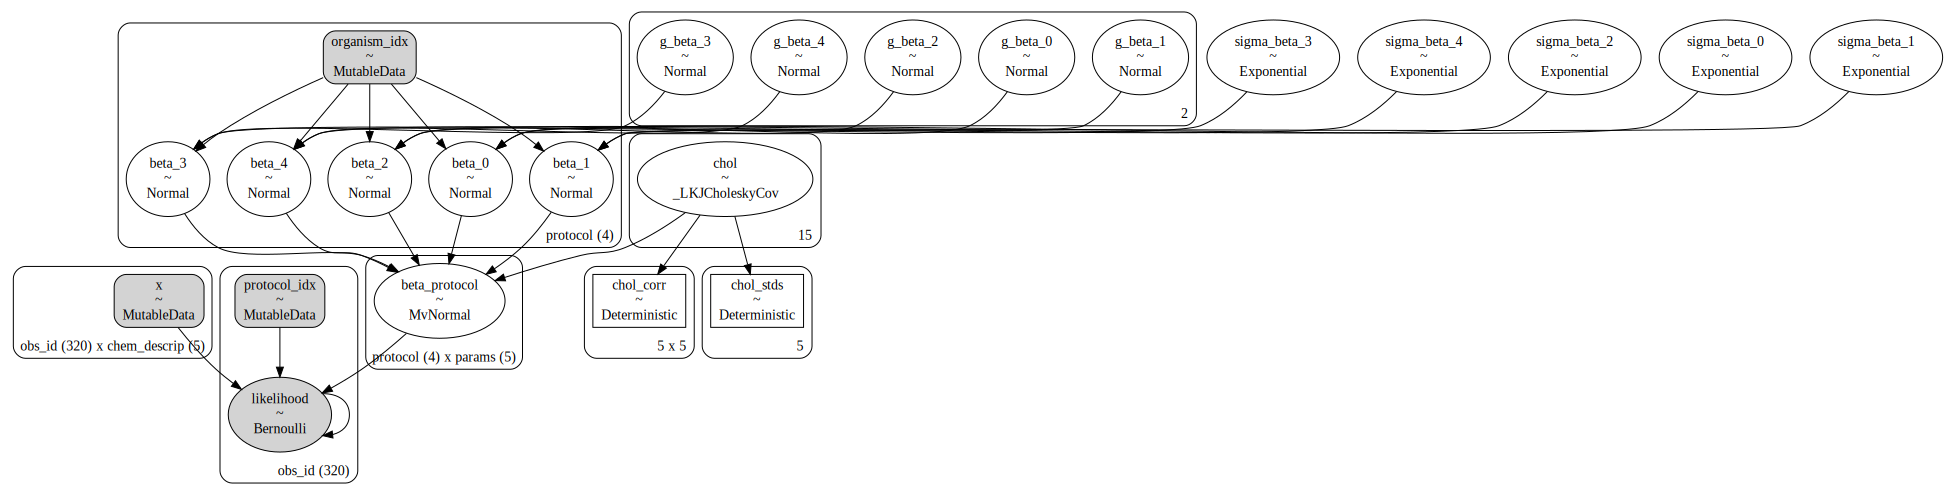

In [187]:
pm.model_to_graphviz(assay_level_model)

In [188]:
with assay_level_model:
    tr_assay = pm.sample(500, tune=500, init="adapt_diag",chains=4,cores=8)


/opt/anaconda3/lib/python3.9/site-packages/pymc/aesaraf.py:1005: UserWarning: The parameter 'updates' of aesara.function() expects an OrderedDict, got <class 'dict'>. Using a standard dictionary here results in non-deterministic behavior. You should use an OrderedDict if you are using Python 2.7 (collections.OrderedDict for older python), or use a list of (shared, update) pairs. Do not just convert your dictionary to this type before the call as the conversion will still be non-deterministic.
  aesara_function = aesara.function(
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...


ValueError: Input dimension mismatch. (input[0].shape[0] = 400, input[1].shape[0] = 320)
Apply node that caused the error: Elemwise{Composite{((i0 * i1) + (i2 * i3) + (i4 * i5) + (i6 * i7) + (i8 * i9))}}[(0, 0)](AdvancedSubtensor.0, Subtensor{::, int64}.0, AdvancedSubtensor.0, Subtensor{::, int64}.0, AdvancedSubtensor.0, Subtensor{::, int64}.0, AdvancedSubtensor.0, Subtensor{::, int64}.0, AdvancedSubtensor.0, Subtensor{::, int64}.0)
Toposort index: 43
Inputs types: [TensorType(float64, (None,)), TensorType(float64, (None,)), TensorType(float64, (None,)), TensorType(float64, (None,)), TensorType(float64, (None,)), TensorType(float64, (None,)), TensorType(float64, (None,)), TensorType(float64, (None,)), TensorType(float64, (None,)), TensorType(float64, (None,))]
Inputs shapes: [(400,), (320,), (400,), (320,), (400,), (320,), (400,), (320,), (400,), (320,)]
Inputs strides: [(8,), (8,), (8,), (8,), (8,), (8,), (8,), (8,), (8,), (8,)]
Inputs values: ['not shown', 'not shown', 'not shown', 'not shown', 'not shown', 'not shown', 'not shown', 'not shown', 'not shown', 'not shown']
Outputs clients: [[Elemwise{sigmoid,no_inplace}(Elemwise{Composite{((i0 * i1) + (i2 * i3) + (i4 * i5) + (i6 * i7) + (i8 * i9))}}[(0, 0)].0), Elemwise{Composite{Switch(i0, Switch(i1, log(i2), (-scalar_softplus(i3))), i4)}}[(0, 2)](InplaceDimShuffle{x}.0, likelihood{[0 0 0 1 1..1 0 1 0 0]}, Elemwise{sigmoid,no_inplace}.0, Elemwise{Composite{((i0 * i1) + (i2 * i3) + (i4 * i5) + (i6 * i7) + (i8 * i9))}}[(0, 0)].0, TensorConstant{(1,) of -inf})]]

HINT: Re-running with most Aesara optimizations disabled could provide a back-trace showing when this node was created. This can be done by setting the Aesara flag 'optimizer=fast_compile'. If that does not work, Aesara optimizations can be disabled with 'optimizer=None'.
HINT: Use the Aesara flag `exception_verbosity=high` for a debug print-out and storage map footprint of this Apply node.

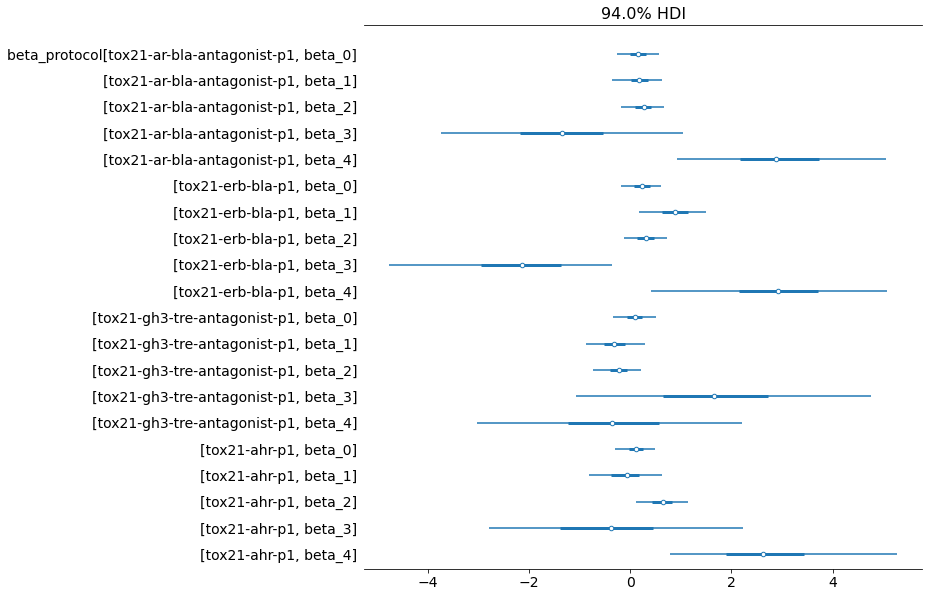

In [130]:
import arviz as az
with assay_level_model:
    az.plot_forest(
        tr_assay,
        combined=True,
        var_names=["beta_protocol"],
        figsize=(10, 10),
        textsize=14,
    )

In [132]:
tr_assay

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data
	> constant_data

In [133]:
RANDOM_SEED = 10
with assay_level_model:
#     y_test_pred = pm.sample_posterior_predictive(tr_assay, var_names=["likelihood"], random_seed=RANDOM_SEED)
#     model_preds = y_test_pred['posterior_predictive']["likelihood"]
#     y_test_pred
    y_test_pred = pm.sample_posterior_predictive(tr_assay, random_seed=RANDOM_SEED)
    prior = pm.sample_prior_predictive(150)

/var/folders/mw/vsqjplld57v73jz2c0hw5x00llg6y6/T/ipykernel_16390/3461002593.py:6: FutureWarning: In this version, RNG seeding is managed by the Model objects. See the `rng_seeder` argument in Model's constructor.
  y_test_pred = pm.sample_posterior_predictive(tr_assay, random_seed=RANDOM_SEED)


/opt/anaconda3/lib/python3.9/site-packages/pymc/aesaraf.py:1005: UserWarning: The parameter 'updates' of aesara.function() expects an OrderedDict, got <class 'dict'>. Using a standard dictionary here results in non-deterministic behavior. You should use an OrderedDict if you are using Python 2.7 (collections.OrderedDict for older python), or use a list of (shared, update) pairs. Do not just convert your dictionary to this type before the call as the conversion will still be non-deterministic.
  aesara_function = aesara.function(
Got error No model on context stack. trying to find log_likelihood in translation.
/opt/anaconda3/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


ValueError: Using the `InferenceData` as a `trace` argument won't work. Please use the `arviz.InferenceData.extend` method to extend the `InferenceData` with groups from another `InferenceData`.

In [137]:
prior

Inference data with groups:
	> prior
	> prior_predictive
	> observed_data

In [154]:
predictors_out_of_sample = X.sample(n=50, random_state = 2)[['BCUT2D_CHGHI', 'BCUT2D_MRLOW', 'Chi0', 'Chi0n']]
predictors_out_of_sample.insert(0,'Intercept',1)
predictors_out_of_sample = np.asarray(predictors_out_of_sample, dtype='float64')
print(predictors_out_of_sample.shape)
outcomes_out_of_sample = y.sample(n=50, random_state = 2)

RANDOM_SEED = 10
### generate fake out of sample for prediction
protocol_pred = ["tox21-car-agonist-p1", "tox21-elg1-luc-agonist-p1"]
chem_descrip_pred = np.array([1, 3.6, 5.1, 0.5, 0.013])
# with assay_level_model:
#     # update values of predictors:
#     pm.set_data({
# #         "pred": predictors_out_of_sample,
#                  "protocol_idx":list(factorized_protocols[0]),
#                  "organism_idx": organisms,
#                  "tissue_idx": tissues})
#     # use the updated values and predict outcomes and probabilities:
#     posterior_predictive = pm.sample_posterior_predictive(
#         tr_assay, var_names=["p"], random_seed=RANDOM_SEED
#     )
#     model_preds = posterior_predictive["p"]
    
prediction_coords = {"obs_id": ['tox21-ar-bla-antagonist-p1','tox21-erb-bla-p1']}
with assay_level_model:
    pm.set_data({
#         "x": predictors_out_of_sample,
        "organism_idx": np.array([0, 1]),
        "protocol_idx": protocol_pred
    })
#     stl_pred = pm.fast_sample_posterior_predictive(
#         tr_assay.posterior, random_seed=RANDOM_SEED
#     )
#     az.from_pymc3_predictions(
#         stl_pred, idata_orig=tr_assay, inplace=True, coords=prediction_coords
#     )
    posterior_predictive = pm.sample_posterior_predictive(
        tr_assay, var_names=["likelihood"], random_seed=RANDOM_SEED
    )
    model_preds = posterior_predictive["likelihood"]

(50, 5)


AttributeError: 'NoneType' object has no attribute 'inputs'

In [148]:
type(predictors_out_of_sample)
# X4_bayes.ndim

numpy.ndarray

In [53]:
# y_test.posterior_predictive
print(len(y_test_pred.posterior_predictive.likelihood[0][1]))

400


In [199]:
import pymc as pm
xx = np.array([[1, 2], [3, 4]])
yy = np.array([[1, 2], [1, 2]])
with pm.Model() as model:
    x = pm.MutableData('x', xx)
    y = pm.MutableData('y', yy)
    beta = pm.Normal('beta', 0, 1)
    obs = pm.Normal('obs', x * beta, 2, observed=y, shape=y.shape)
    idata = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta]


/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 33 seconds.


In [200]:
x_new = np.array([[5, 6], [7, 8]])
with model:
    pm.set_data({'x': x_new})
    y_test = pm.sample_posterior_predictive(idata)

print(y_test.posterior_predictive['obs'].mean(('chain', 'draw')))

# >>> array([4.6088569 , 5.54128318, 8.32953844, 11.14044852, 13.94178173])

<xarray.DataArray 'obs' (obs_dim_0: 2, obs_dim_1: 2)>
array([[2.40904591, 2.82154896],
       [3.3176706 , 3.78151911]])
Coordinates:
  * obs_dim_0  (obs_dim_0) int64 0 1
  * obs_dim_1  (obs_dim_1) int64 0 1


In [101]:
import pymc3
y_test.posterior_predictive['beta_protocol'].shape
az.plot_ppc(az.from_pymc3(posterior_predictive=y_test, model=assay_level_model))


AttributeError: 'Dataset' object has no attribute 'shape'

/opt/anaconda3/lib/python3.9/site-packages/arviz/plots/plot_utils.py:271: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (74) in plot_posterior, generating only 40 plots
  warnings.warn(


array([[<AxesSubplot:title={'center':'g_beta_0\n0'}>,
        <AxesSubplot:title={'center':'g_beta_0\n1'}>,
        <AxesSubplot:title={'center':'g_beta_0\n2'}>,
        <AxesSubplot:title={'center':'beta_0\ntox21-ar-bla-antagonist-p1'}>],
       [<AxesSubplot:title={'center':'beta_0\ntox21-erb-bla-p1'}>,
        <AxesSubplot:title={'center':'beta_0\ntox21-gh3-tre-antagonist-p1'}>,
        <AxesSubplot:title={'center':'beta_0\ntox21-ahr-p1'}>,
        <AxesSubplot:title={'center':'g_beta_1\n0'}>],
       [<AxesSubplot:title={'center':'g_beta_1\n1'}>,
        <AxesSubplot:title={'center':'g_beta_1\n2'}>,
        <AxesSubplot:title={'center':'beta_1\ntox21-ar-bla-antagonist-p1'}>,
        <AxesSubplot:title={'center':'beta_1\ntox21-erb-bla-p1'}>],
       [<AxesSubplot:title={'center':'beta_1\ntox21-gh3-tre-antagonist-p1'}>,
        <AxesSubplot:title={'center':'beta_1\ntox21-ahr-p1'}>,
        <AxesSubplot:title={'center':'g_beta_2\n0'}>,
        <AxesSubplot:title={'center':'g_beta_2\n1

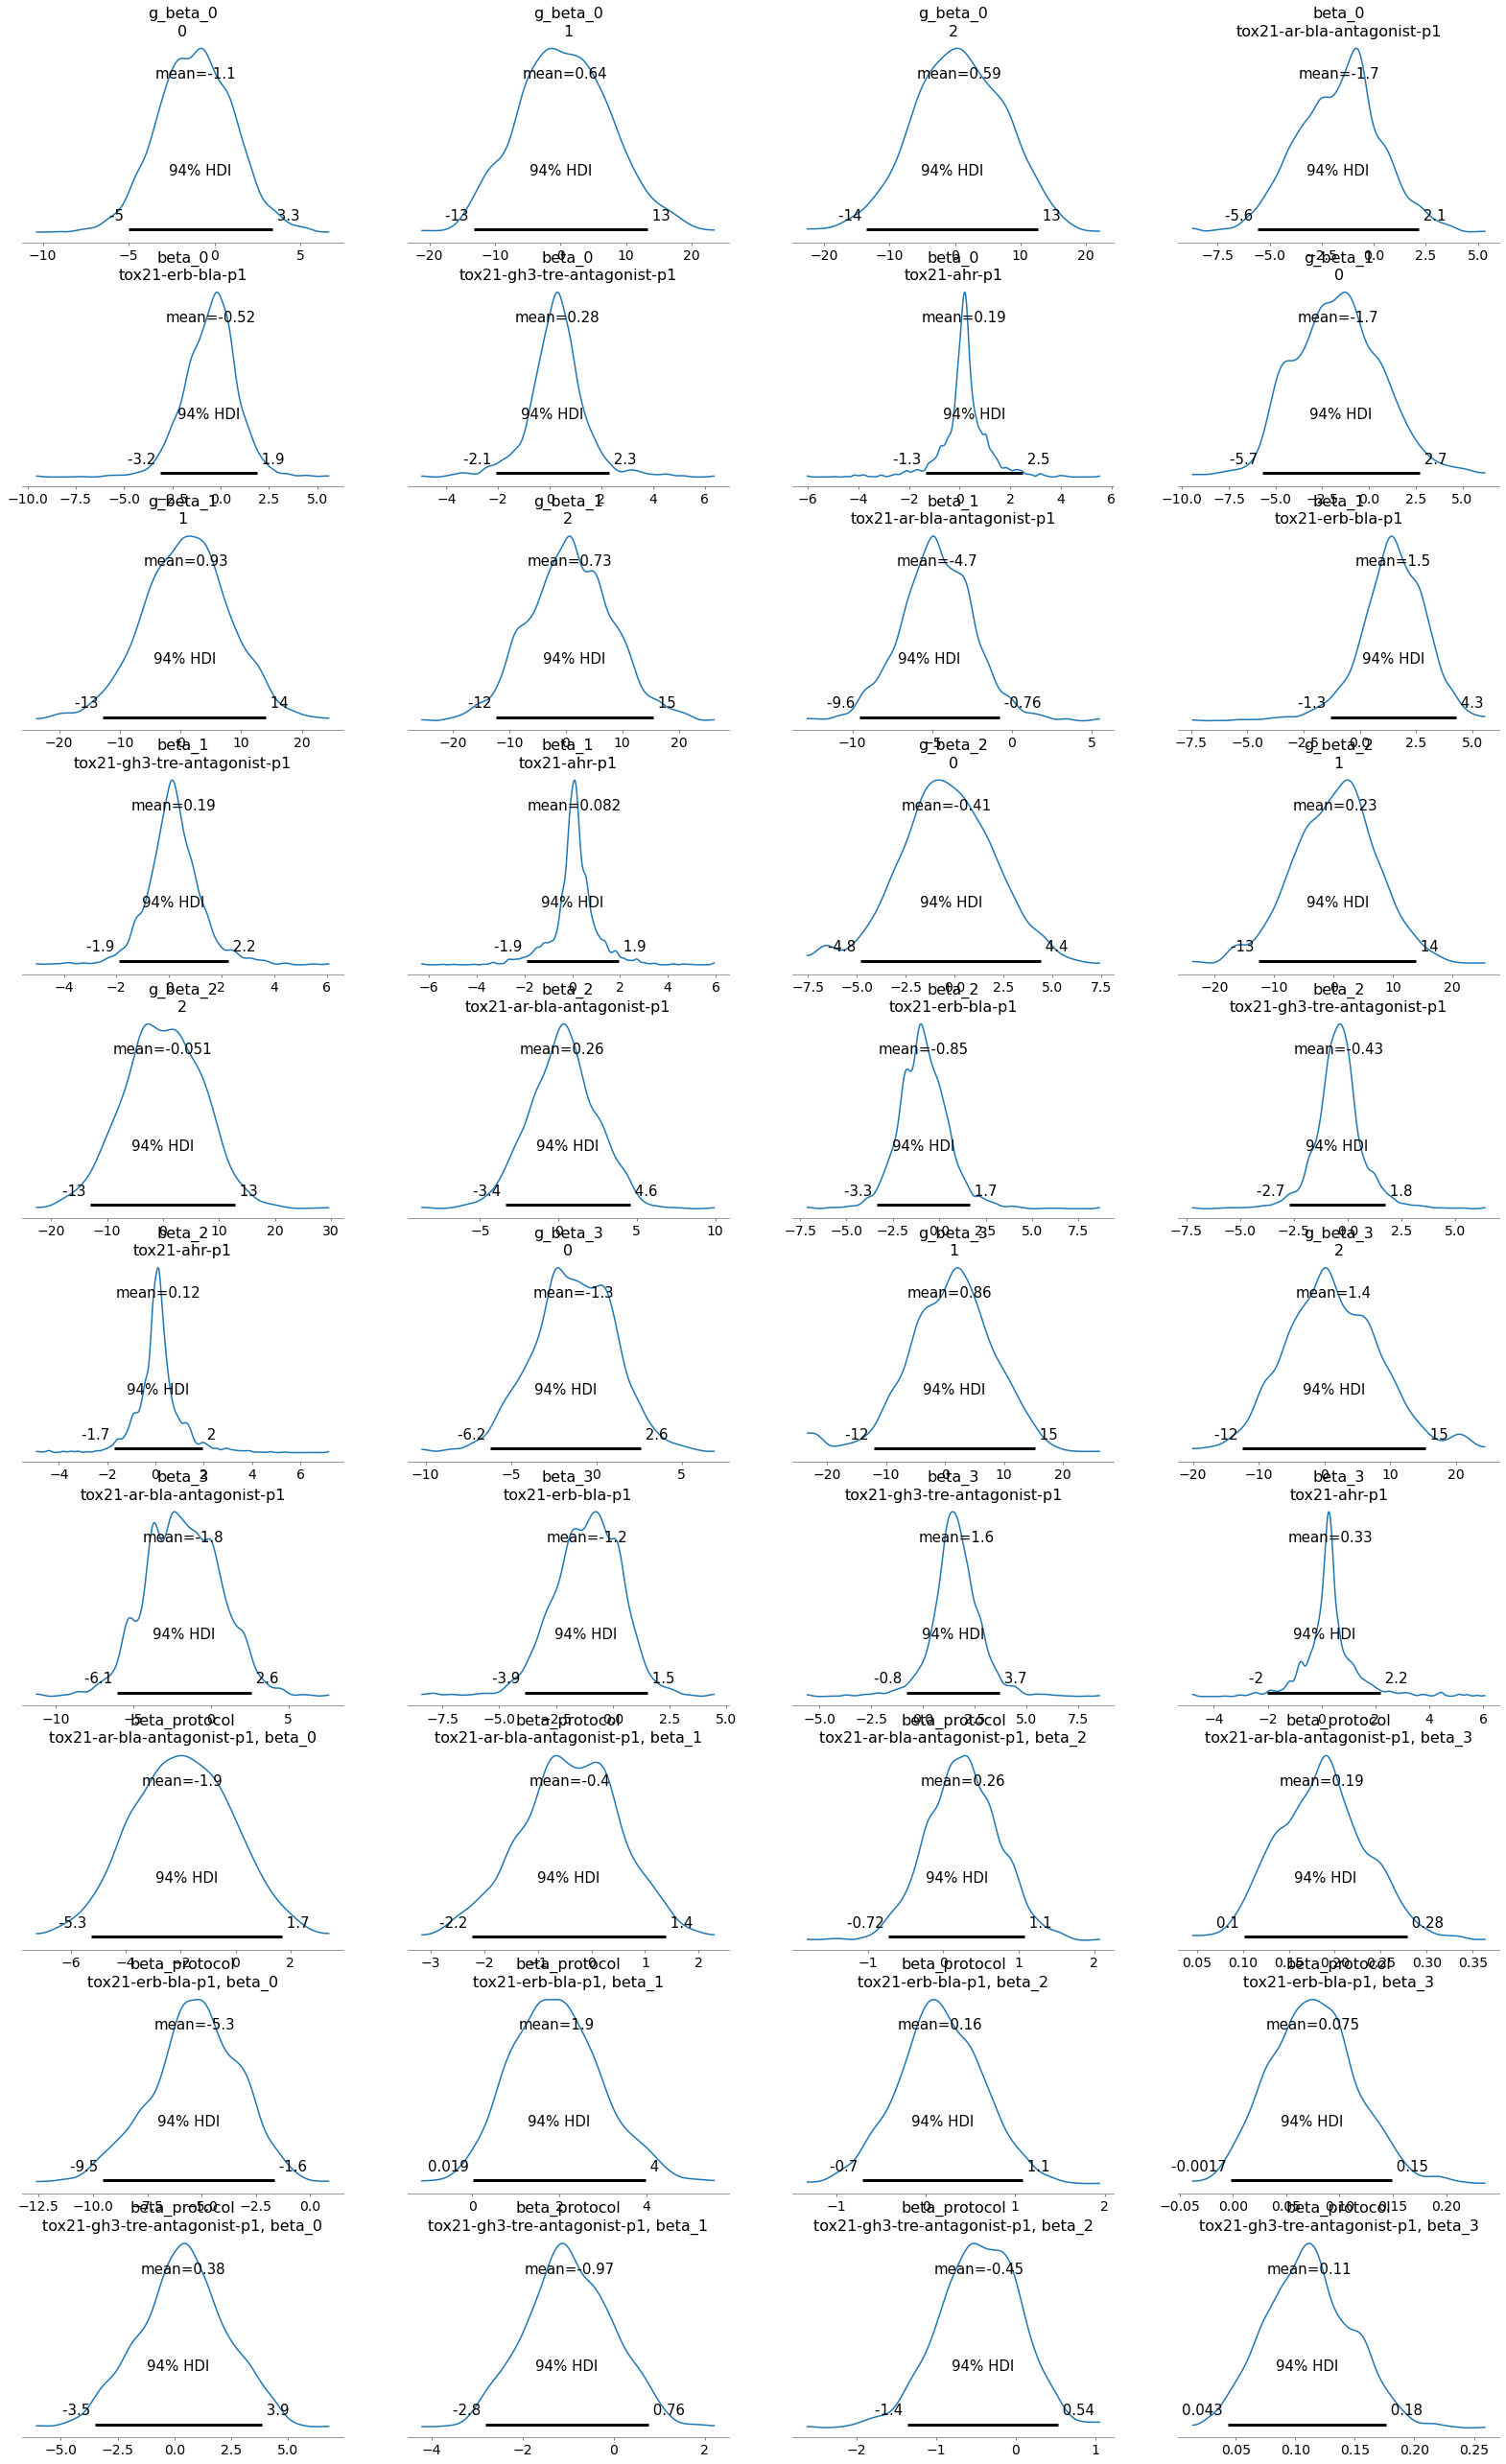

In [108]:
# az.plot_trace(tr_assay)
# import mat
az.plot_posterior(tr_assay)

# plt.show()

In [110]:
# from scipy.special import expit as logistic
# predictors_out_of_sample = np.random.normal(size=50)
# predictors_out_of_sample = chem_des[['BCUT2D_CHGHI', 'BCUT2D_MRLOW','Chi0n']]
# predictors_out_of_sample.insert(0,'Intercept',1)
# predictors_out_of_sample = np.asarray(predictors_out_of_sample)
# # outcomes_out_of_sample = np.random.binomial(
# #     1, logistic(true_intercept + true_slope * predictors_out_of_sample)
# # )

# with assay_level_model:
#     # update values of predictors:
#     pm.set_data({"pred": predictors_out_of_sample})
#     # use the updated values and predict outcomes and probabilities:
#     posterior_predictive = pm.sample_posterior_predictive(
#         tr_assay, var_names=["p"], random_seed=222
#     )
#     model_preds = posterior_predictive["p"]
with assay_level_model:
    display(az.summary(tr_assay, round_to=2).head(30))

/opt/anaconda3/lib/python3.9/site-packages/arviz/stats/diagnostics.py:586: RuntimeWarning: invalid value encountered in double_scalars
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
g_beta_0[0],-1.12,2.24,-5.03,3.34,0.08,0.07,726.90,681.02,1.00
g_beta_0[1],0.64,7.16,-13.27,13.30,0.30,0.21,589.85,1133.70,1.00
g_beta_0[2],0.59,7.08,-13.56,12.64,0.31,0.22,531.74,1169.64,1.00
beta_0[tox21-ar-bla-antagonist-p1],-1.68,2.05,-5.58,2.14,0.08,0.06,736.68,830.02,1.01
beta_0[tox21-erb-bla-p1],-0.52,1.37,-3.15,1.89,0.05,0.05,694.70,912.70,1.01
beta_0[tox21-gh3-tre-antagonist-p1],0.28,1.13,-2.10,2.30,0.04,0.04,973.28,721.17,1.01
beta_0[tox21-ahr-p1],0.19,0.95,-1.34,2.51,0.03,0.03,771.72,636.30,1.01
g_beta_1[0],-1.66,2.38,-5.72,2.69,0.10,0.11,498.66,566.57,1.02
g_beta_1[1],0.93,7.25,-12.87,14.12,0.33,0.35,486.41,562.02,1.02
g_beta_1[2],0.73,7.43,-12.33,15.42,0.36,0.26,434.51,552.90,1.02
